In [1]:
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from typing import Tuple
import random

In [2]:
#input_file = str(pathlib.Path.home()) + '/data/log_truth_merge_rootfile/10_dst/truthMatchedDaVinciLog.h5'

s = 0.9

io_folder = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/s_'
    + str(s)
    + '/')

input_file = io_folder + 'truthMatchedDaVinciLog.h5' 

save_plots = True

In [3]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 'true_vertex_study/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

In [4]:
converged_color = 'tab:blue'
failed_color = 'tab:orange'

In [5]:
random.seed(10)

# Import data

In [6]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')

In [7]:
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,13094.50,13103.20,70.6920,1.017340e+03,1.018390e+03,346428.0,346658.0,346889.0,12,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,1.102000,-0.738523,67.994822,411.191830,-70.957544,5999.019049,1.1019,-0.7389,67.9972,801.966127,...,-22402.00,-22457.50,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10384,20.640930
1224,1.102000,-0.738523,67.994822,411.191830,-70.957544,5999.019049,1.1019,-0.7389,67.9972,801.966127,...,-2638.93,-2640.41,23.8941,-9.467890e+02,-9.474590e+02,71973.2,72012.8,72052.4,5563,27.830591
1225,1.102000,-0.738523,67.994822,411.191830,-70.957544,5999.019049,1.1019,-0.7389,67.9972,801.966127,...,-10306.20,-10315.70,87.4525,-3.670550e+03,-3.674370e+03,242274.0,242494.0,242715.0,7191,23.141933
1226,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2821250.00,2826850.00,525617.0000,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040


# Helper functions

In [8]:
def plot_overlapping_histos(
    df: pd.DataFrame, ## Full DataFrame
    series: pd.Series, ## Series built from df columns. May be a column itself
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True
):
    ## Converged events
    plt.hist(
        series.loc[df['status'] == 'Converged'],
        bins=binning,
        range=boundaries,
        label="Converged",
        histtype='stepfilled',
        edgecolor=converged_color,
        color=mcolors.to_rgba(converged_color, alpha=0.05),
        density=normalized
    )
    
    ## Failed
    plt.hist(
        series.loc[df['status'] == 'NonConverged'],
         bins=binning,
         range=boundaries,
         label="Failed",
         histtype='stepfilled',
         edgecolor=failed_color,
         color=mcolors.to_rgba(failed_color, alpha=0.05),
         density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

# Study the vertex seed
Now with truth match!

In [9]:
feature_boundary_dictionary = {
    'seed_vtx_X': (-500,500),
    'seed_vtx_Y': (-500,500),
    'seed_vtx_Z': (-1000,10000),
}

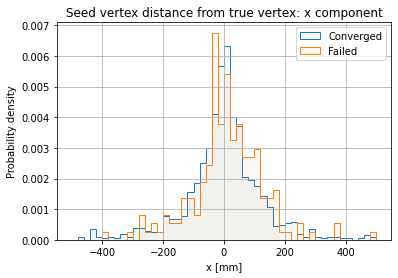

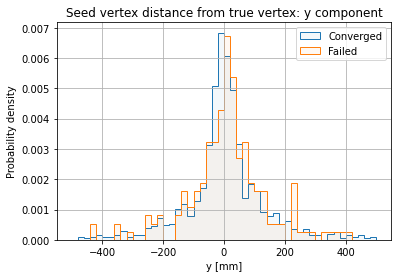

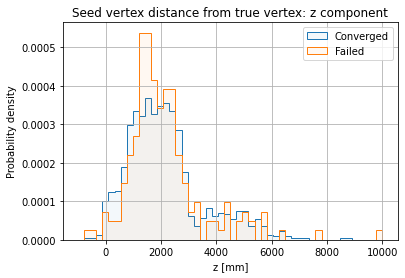

In [10]:
for comp in ['x', 'y', 'z']:
    seed_feature = 'seed_vtx_' + comp.upper()
    true_feature = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()

    plot_args = {
        'axis_label': comp + ' [mm]',
        'plot_title': 'Seed vertex distance from true vertex: ' + comp + " component",
        'file_name': seed_feature,
        'binning': 50,
        'boundaries': feature_boundary_dictionary[seed_feature],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True    
    }

    plot_overlapping_histos(
        df_events,
        df_events[seed_feature] - df_events[true_feature],
        **plot_args)

# Plot event topology

In [11]:
coord_to_vector_comp = {
    'x': 0,
    'y': 1,
    'z': 2
}

coord_to_suffix = {
    'x': '_X',
    'y': '_Y',
    'z': '_Z'
}

coord_to_boundaries = {
    'x': (-2000,2000),
    'y': (-2000,2000),
    'z': (0,9000)
}

In [12]:
def plot_event_plane(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True,
    sort_by_x_axis_comp: bool = False,
) -> None:
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df.iloc[event_index]
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event['seed_vtx' + coord_to_suffix[x_axis]],
        event['seed_vtx' + coord_to_suffix[y_axis]]
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices']]
    
    p_refpoints = []
    p_refpoints.append([
        event['p_refPoint' + coord_to_suffix[x_axis]],
        event['p_refPoint' + coord_to_suffix[y_axis]]
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event['pim_refPoint' + coord_to_suffix[x_axis]],
        event['pim_refPoint' + coord_to_suffix[y_axis]]
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint']]
    
    if sort_by_x_axis_comp:
        #vertices.sort()
        
        ## Get indices (a.k.a. iteration number) after sorting for fakesies
        #iteration_plot_order = [b[0] for b in sorted(enumerate(p_refpoints), key=lambda i:i[1])]
        ## Now sort for realsies
        p_refpoints.sort()
        pim_refpoints.sort()
        
        ## The following assumes the x component of p_refPoints and pim_refPoints is the same
        ## It will only make sense in zy and zx plots, since z components are shared because
        ## of how transportation is performed. This being said: this entire mode has been
        ## added with those planes in mind.
        #for iteration, refPoint in zip(iteration_plot_order, p_refpoints):
        #    ax.axvline(refPoint[0], color='grey', linestyle='dotted')
    
    ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    ax.plot(*zip(*p_refpoints), color='tab:red', marker='x', linestyle='-', label='Proton')
    ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='x', linestyle='-', label='Pion')
    
    if show_arrows:
        p_momenta = []
        p_momenta.append([
            event['p_momentum' + coord_to_suffix[x_axis]],
            event['p_momentum' + coord_to_suffix[y_axis]]
        ])
        p_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_p_momentum']]
        
        pim_momenta = []
        pim_momenta.append([
            event['pim_momentum' + coord_to_suffix[x_axis]],
            event['pim_momentum' + coord_to_suffix[y_axis]]
        ])
        pim_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_pim_momentum']]
        
        ax.quiver(*zip(*p_refpoints), *zip(*p_momenta), color='tab:red')
        ax.quiver(*zip(*pim_refpoints), *zip(*pim_momenta), color='tab:blue')
        
    if show_true_vertex:
        mew = 1.5
        
        true_L_endvertex = [
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]]
        ]
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
        #true_p_momentum = [
        #    event['MCTRUTH_p_P' + x_axis.upper()],
        #    event['MCTRUTH_p_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_p_momentum, color='tab:red')
        
        #true_pim_momentum = [
        #    event['MCTRUTH_pim_P' + x_axis.upper()],
        #    event['MCTRUTH_pim_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_pim_momentum, color='tab:blue')
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(event_index) + " (" + event['status'] + ")\n$" + x_axis + y_axis + "$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best')
    
    if save_plots:
        file_name = 'evt_' + str(event_index) + '_' + x_axis + y_axis
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [13]:
def plot_all_event_planes(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True
) -> None:
    
    common_arguments = {
        'tight_axes': tight_axes,
        'show_arrows': show_arrows,
        'show_true_vertex': show_true_vertex
    }
    
    plot_event_plane(df, event_index, 'x', 'y', sort_by_x_axis_comp=False, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'x', sort_by_x_axis_comp=True, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'y', sort_by_x_axis_comp=True, **common_arguments)
    
    #PlotEvent3DPlane(index, interactive=False, tightAxes=tightAxes, showArrows=showArrows)

In [14]:
def plot_event_plane_2D(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    show_final_vertex: bool = False,
    sort_by_x_axis_comp: bool = False,
) -> None:
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df.iloc[event_index]
    
    if pd.isna(event['status_2D']):
        raise ValueError("Event " + str(event_index) + " has not undergone a 2D refit.")
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event['seed_vtx_2D'][x_comp],
        event['seed_vtx_2D'][y_comp]
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices_2D']]
    
    p_refpoints = []
    p_refpoints.append([
        event['p_refPoint_2D'][x_comp],
        event['p_refPoint_2D'][y_comp]
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint_2D']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event['pim_refPoint_2D'][x_comp],
        event['pim_refPoint_2D'][y_comp]
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint_2D']]
    
    if sort_by_x_axis_comp:
        #vertices.sort()
        
        ## Get indices (a.k.a. iteration number) after sorting for fakesies
        #iteration_plot_order = [b[0] for b in sorted(enumerate(p_refpoints), key=lambda i:i[1])]
        ## Now sort for realsies
        p_refpoints.sort()
        pim_refpoints.sort()
        
        ## The following assumes the x component of p_refPoints and pim_refPoints is the same
        ## It will only make sense in zy and zx plots, since z components are shared because
        ## of how transportation is performed. This being said: this entire mode has been
        ## added with those planes in mind.
        #for iteration, refPoint in zip(iteration_plot_order, p_refpoints):
        #    ax.axvline(refPoint[0], color='grey', linestyle='dotted')
    
    ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    ax.plot(*zip(*p_refpoints), color='tab:red', marker='x', linestyle='-', label='Proton')
    ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='x', linestyle='-', label='Pion')
    
#    if show_arrows:
#        p_momenta = []
#        p_momenta.append([
#            event['p_momentum_2D'][x_comp],
#            event['p_momentum_2D'][y_comp],
#        ])
#        p_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_p_momentum_2D']]
#        
#        pim_momenta = []
#        pim_momenta.append([
#            event['pim_momentum' + coord_to_suffix[x_axis]],
#            event['pim_momentum' + coord_to_suffix[y_axis]]
#        ])
#        pim_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_pim_momentum_2D']]
#        
#        ax.quiver(*zip(*p_refpoints), *zip(*p_momenta), color='tab:red')
#        ax.quiver(*zip(*pim_refpoints), *zip(*pim_momenta), color='tab:blue')
        
    if show_true_vertex:
        mew = 1.5
        
        true_L_endvertex = [
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]]
        ]
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
        #true_p_momentum = [
        #    event['MCTRUTH_p_P' + x_axis.upper()],
        #    event['MCTRUTH_p_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_p_momentum, color='tab:red')
        
        #true_pim_momentum = [
        #    event['MCTRUTH_pim_P' + x_axis.upper()],
        #    event['MCTRUTH_pim_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_pim_momentum, color='tab:blue')
    
    if show_final_vertex:
        mew = 1.5
        
        last_L_endvertex = [
            event['iter_currentVertices_2D'][-1][x_comp],
            event['iter_currentVertices_2D'][-1][y_comp]
        ]
        
        ax.plot(
            *last_L_endvertex,
            color='tab:orange',
            label='Reconstructed vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *last_L_endvertex,
            color='tab:orange',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )    
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(event_index) + " (" + event['status_2D'] + ")\n2D-algorithm $" + x_axis + y_axis + "$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best')
    
    if save_plots:
        file_name = 'evt_' + str(event_index) + '_2D_' + x_axis + y_axis
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [15]:
def plot_all_event_planes_2D(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    show_final_vertex: bool = False
) -> None:
    
    common_arguments = {
        'tight_axes': tight_axes,
        'show_true_vertex': show_true_vertex,
        'show_final_vertex': show_final_vertex
    }
    
    plot_event_plane_2D(df, event_index, 'x', 'y', sort_by_x_axis_comp=False, **common_arguments)
    plot_event_plane_2D(df, event_index, 'z', 'x', sort_by_x_axis_comp=True, **common_arguments)
    plot_event_plane_2D(df, event_index, 'z', 'y', sort_by_x_axis_comp=True, **common_arguments)

# Explore 2-D converged events

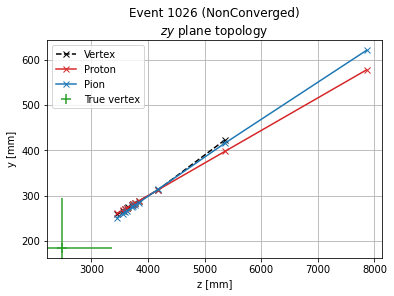

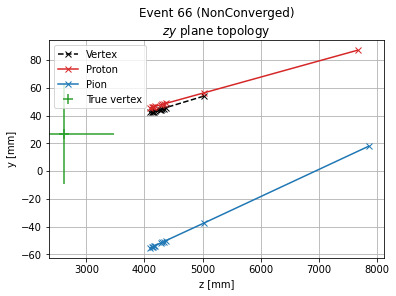

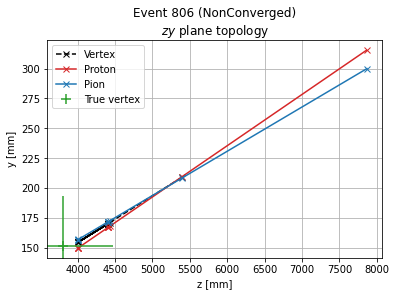

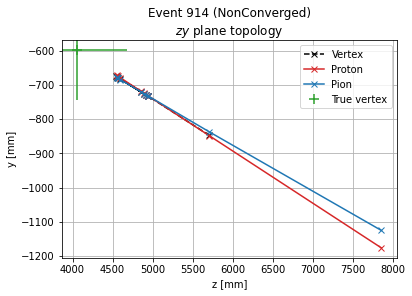

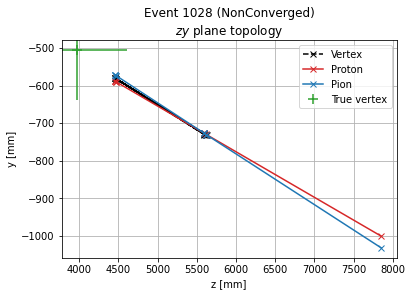

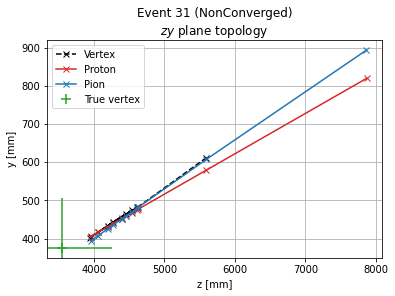

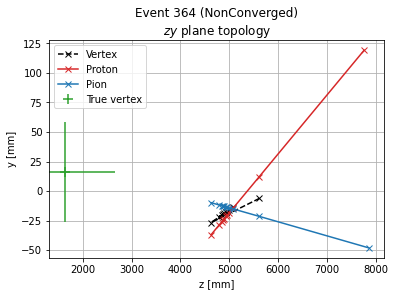

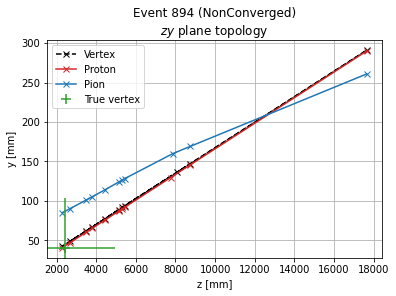

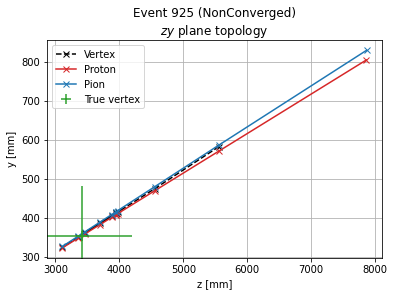

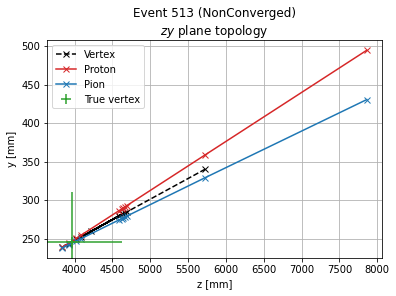

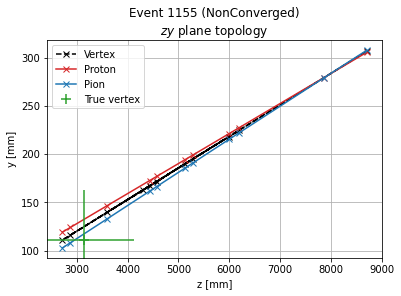

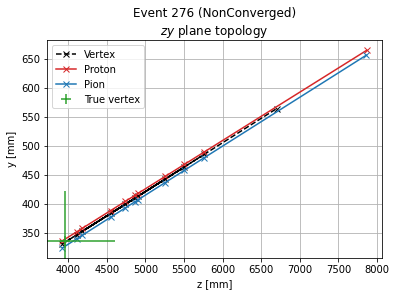

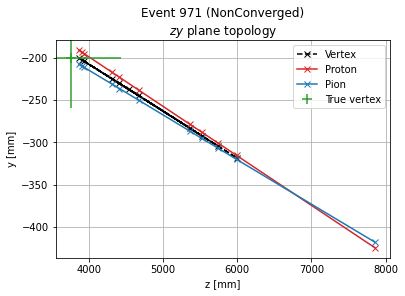

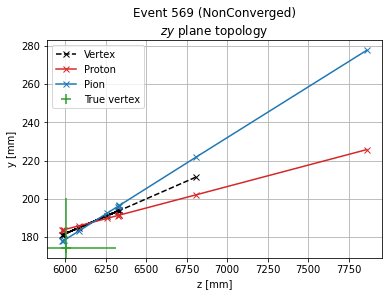

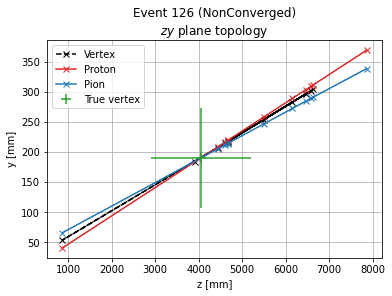

In [16]:
non_conv_indices = list(df_events.loc[(df_events['status'] == 'NonConverged') & (df_events['status_2D'] == 'Converged2D')].index)

for index in random.sample(non_conv_indices, 15):
    plot_event_plane(df_events, index,'z','y', tight_axes=True, show_arrows=False, show_true_vertex=True, sort_by_x_axis_comp=True)    

## More specific events

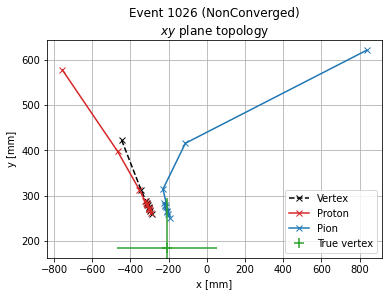

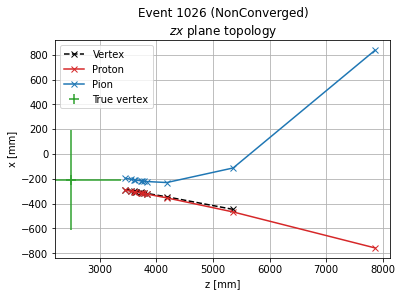

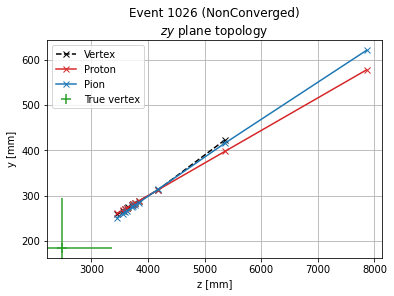

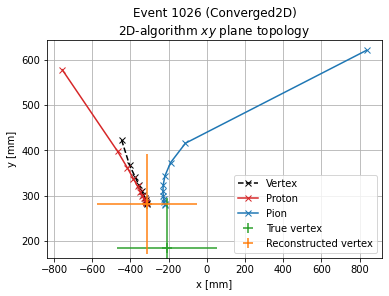

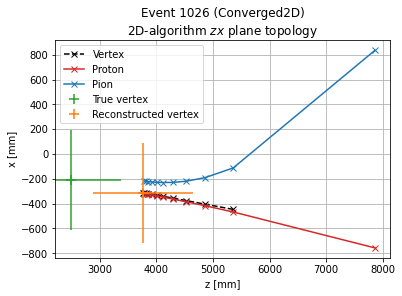

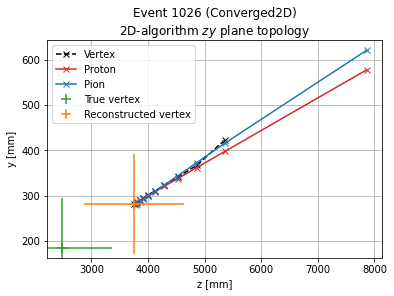

In [17]:
event_index = 1026

plot_all_event_planes(df_events, event_index, tight_axes=True, show_arrows=False, show_true_vertex=True)
plot_all_event_planes_2D(df_events, event_index, tight_axes=True, show_true_vertex=True, show_final_vertex=True)

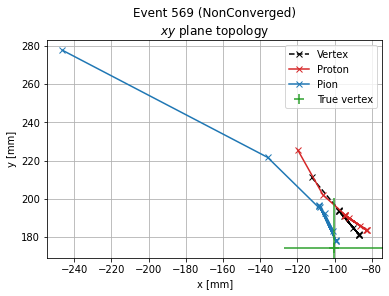

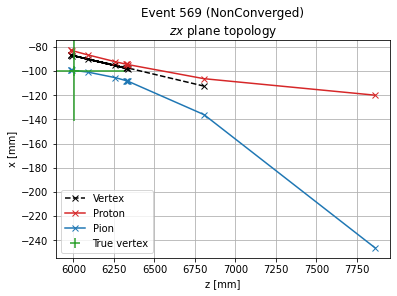

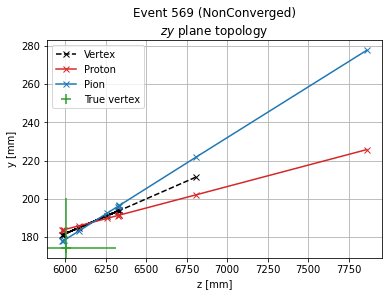

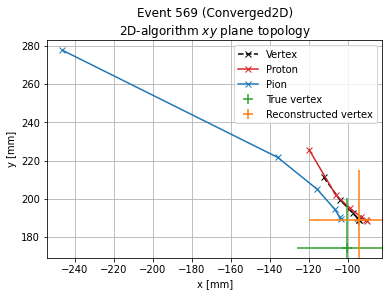

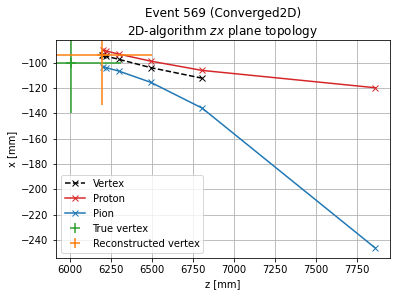

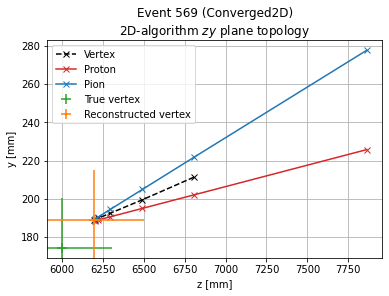

In [18]:
event_index = 569

plot_all_event_planes(df_events, event_index, tight_axes=True, show_arrows=False, show_true_vertex=True)
plot_all_event_planes_2D(df_events, event_index, tight_axes=True, show_true_vertex=True, show_final_vertex=True)

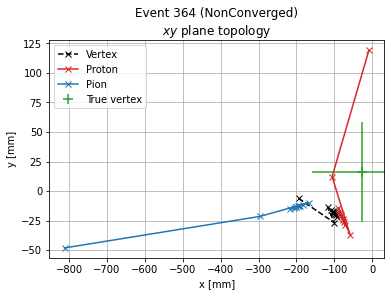

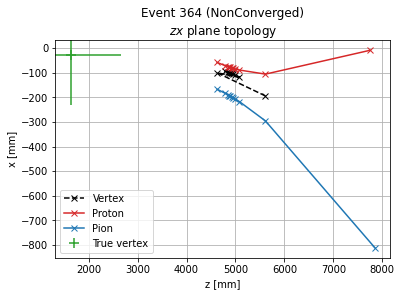

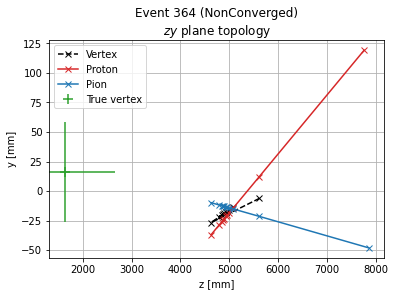

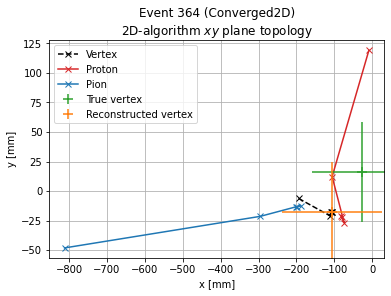

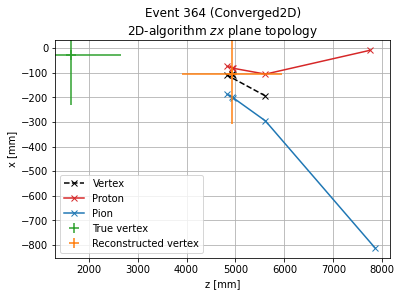

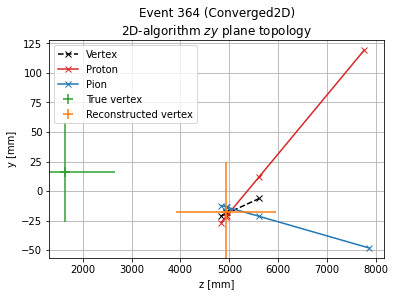

In [23]:
event_index = 364

plot_all_event_planes(df_events, event_index, tight_axes=True, show_arrows=False, show_true_vertex=True)
plot_all_event_planes_2D(df_events, event_index, tight_axes=True, show_true_vertex=True, show_final_vertex=True)

# Explore non-2D converged events

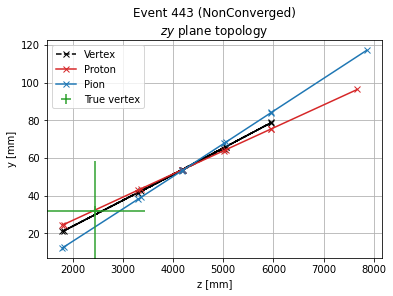

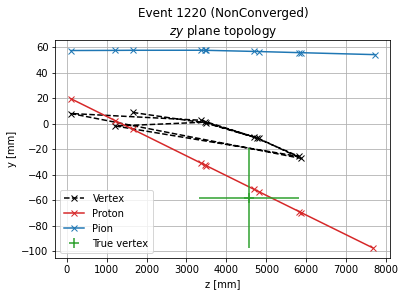

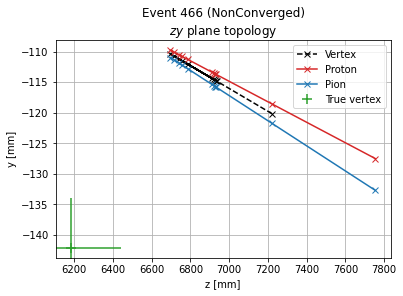

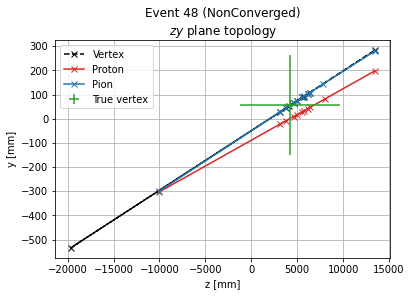

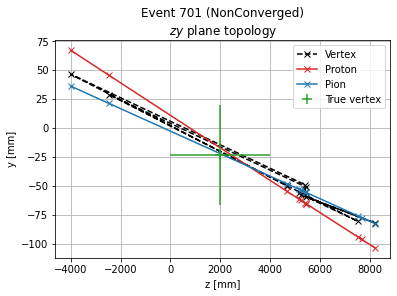

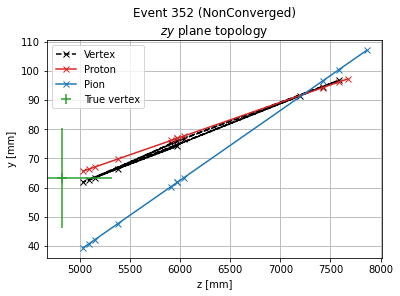

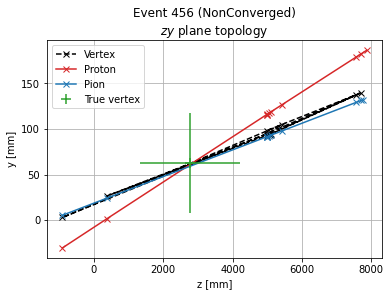

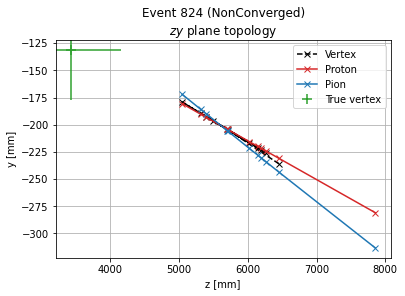

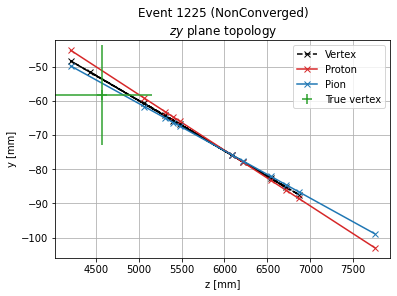

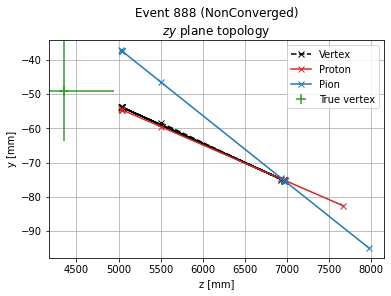

In [19]:
non_conv_indices = list(df_events.loc[(df_events['status'] == 'NonConverged') & (df_events['status_2D'] == 'NonConverged2D')].index)

for index in random.sample(non_conv_indices, 10):
    plot_event_plane(df_events, index,'z','y', tight_axes=True, show_arrows=False, show_true_vertex=True, sort_by_x_axis_comp=True)

In [20]:
df_events.loc[(df_events['status'] == 'NonConverged'), 'status_2D'].unique()

array(['Converged2D', 'NonConverged2D'], dtype=object)

In [21]:
df_events.loc[(df_events['status'] == 'NonConverged') & (df_events['status_2D'] == 'NonConverged2D')]

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
48,0.747590,-0.091441,-60.109969,110.540039,54.755157,4227.480780,0.7476,-0.0914,-60.1100,952.315092,...,-15147.2000,-15208.4000,113.4530,4107.340,4124.22000,170363.00,171049.00,171738.00,429,0.000033
112,1.113862,0.139170,37.659999,372.447709,75.817183,5308.771520,1.1137,0.1389,37.6537,1518.168263,...,20501.5000,20956.6000,57.6326,1451.040,1483.82000,96113.50,98244.30,100422.00,974,0.000037
352,1.058126,-0.245856,6.716962,354.431961,54.876773,5343.267672,1.0580,-0.2458,6.7166,2759.107513,...,90812.7000,91727.9000,622.4100,16253.300,16422.30000,644569.00,651061.00,657618.00,3095,0.000034
443,0.831598,0.076499,40.997712,148.867231,46.545931,3580.569096,0.8316,0.0765,40.9977,1867.296429,...,185159.0000,188106.0000,505.6790,19926.900,20246.50000,1036090.00,1052580.00,1069320.00,3869,0.000049
456,0.890767,-0.115350,36.083651,-63.409158,46.489996,1858.889268,0.8910,-0.1155,36.0966,570.366189,...,121512.0000,122194.0000,299.9280,16610.700,16704.70000,1147880.00,1154320.00,1160790.00,4020,0.000045
466,1.022490,-0.315157,34.902941,156.319390,-158.008273,6927.473267,1.0228,-0.3155,34.9115,6807.859858,...,12430.1000,12433.1000,623.1010,-26304.700,-26312.50000,1271800.00,1272100.00,1272400.00,4152,29.583823
701,0.666504,-0.228598,28.119641,36.821960,-29.949415,2678.628527,0.6665,-0.2287,28.1198,586.108626,...,-46353.8000,-46507.6000,85.6935,-5636.930,-5655.91000,566039.00,567914.00,569795.00,6006,0.000035
824,0.760818,-0.238665,6.731715,-285.921754,-137.859493,3634.936307,0.7608,-0.2387,6.7315,-2314.820928,...,966.0270,985.5140,32.7864,-228.156,-233.71600,4593.45,4685.23,4778.93,6378,20.714041
888,1.753139,-0.773797,-66.803564,208.170381,-54.034853,4974.695394,1.7535,-0.7742,-66.7989,3736.794428,...,402273.0000,404296.0000,1353.9100,-70193.600,-70548.60000,3964860.00,3984800.00,4004840.00,7408,0.000043
1216,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-4307.5100,-4319.3400,32.7535,-1153.530,-1156.85000,56049.10,56201.20,56353.80,10379,0.000032


In [22]:
df_events.loc[(df_events['status'] == 'NonConverged') & (df_events['status_2D'] == 'Converged2D')]

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
10,1.457771,-1.520459,28.008830,129.025237,-221.896938,6540.523316,1.4582,-1.5206,28.0085,3168.797784,...,4376710.00,4381020.00,145694.0000,-4493800.000,-4498300.00,140968000.0,141107000.0,141246000.0,63,0.000038
14,0.863707,-0.251822,33.096781,-62.989710,-339.228385,4542.681748,0.8637,-0.2518,33.0967,-1721.789323,...,70392.30,70760.30,3715.9600,-54375.400,-54677.20,856174.0,860651.0,865153.0,127,0.000025
17,0.666323,-0.430503,89.505396,-200.780505,-642.357584,5625.025788,0.6663,-0.4305,89.5054,-1005.673433,...,-15988.50,-16231.20,1564.5500,-13394.500,-13602.20,117798.0,119584.0,121398.0,208,0.000041
31,0.903465,-0.224320,-3.672533,140.214598,451.875123,4361.198332,0.9032,-0.2234,-3.6827,1888.562727,...,-7103.94,-7460.71,306.2950,2621.310,2753.71,23145.9,24306.5,25525.6,276,0.000034
38,0.849364,-0.242347,70.092351,-77.147746,-118.128027,5060.423449,0.8493,-0.2423,70.0927,-1071.115084,...,10322.30,10373.30,105.0340,-2586.250,-2600.06,102376.0,102881.0,103389.0,370,0.000045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0.618662,-0.107176,-64.715641,-93.617044,20.499155,3453.418776,0.6187,-0.1071,-64.7165,-2945.615570,...,-70041.70,-70612.80,71.2744,3209.080,3235.50,545307.0,549749.0,554228.0,10320,0.000042
1215,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-22402.00,-22457.50,62.7731,-3803.330,-3812.82,252021.0,252644.0,253269.0,10383,0.000044
1217,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-22402.00,-22457.50,62.7731,-3803.330,-3812.82,252021.0,252644.0,253269.0,10385,0.000036
1223,1.102000,-0.738523,67.994822,411.191830,-70.957544,5999.019049,1.1019,-0.7389,67.9972,801.966127,...,-22402.00,-22457.50,62.7731,-3803.330,-3812.82,252021.0,252644.0,253269.0,10384,20.640930
